# Lecture 9 - Machine Learning (3) - Natural Language Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

## Data

* In this lecture, we use the SMS Spam Collection Data Set from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). 
    * A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site.
    * A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore.

In [3]:
df_sms = pd.read_csv('./SMS_Spam.tsv', sep='\t')

In [5]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


* First, how many messages the data have?

In [7]:
df_sms.shape

(5572, 2)

* Then, now, how many spams and hams each other?

In [9]:
df_sms['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Text preprocessing
* For analyzing texts, we need to split each message into individual words.
* Let's remove punctuations first.
    * Python's built-in library **string** would provide a quick and convenient way of removing them.

In [11]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

* Check characters whether they are punctuations or not.

In [13]:
sample = "Hello! This is BIZ693: Artificial Intelligence Business Strategy class."

In [15]:
sample_nopunc = []
for char in sample:
    if char not in string.punctuation:
        sample_nopunc.append(char)

In [19]:
#sample_nopunc

In [21]:
sample_nopunc = "".join(sample_nopunc)

In [23]:
sample_nopunc

'Hello This is BIZ693 Artificial Intelligence Business Strategy class'

* Now, it's a step to remove stopwords. The NLTK library is a kind of stardard library for processing texts in Python (https://www.nltk.org/).
* The NLTK library provide a list of stopwords.

In [25]:
import nltk
from nltk.corpus import stopwords

* We can specify a language for stopwords list.

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/kmlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

* Split the message and remove stopwords according to the list.

In [31]:
sample_nopunc

'Hello This is BIZ693 Artificial Intelligence Business Strategy class'

In [33]:
sample_nopunc.split()

['Hello',
 'This',
 'is',
 'BIZ693',
 'Artificial',
 'Intelligence',
 'Business',
 'Strategy',
 'class']

In [35]:
remove_stopwords = []
for word in sample_nopunc.split():
    if word.lower() not in stopwords.words('english'):
        remove_stopwords.append(word)

In [37]:
remove_stopwords

['Hello',
 'BIZ693',
 'Artificial',
 'Intelligence',
 'Business',
 'Strategy',
 'class']

* When you make a function for this, it would be more useful to apply it later.

In [39]:
def preprocessing(text):
    
    # remove punctuation
    nopunc = []
    for char in text:
        if char not in string.punctuation:
            nopunc.append(char)
            
    nopunc = "".join(nopunc)
    
    # remove stopwords
    remove_stop = []
    for word in nopunc.split():
        if word.lower() not in stopwords.words('english'):
            remove_stop.append(word)
            
    # remove words less than three characters
    tokens = []
    for word in remove_stop:
        if len(word) >= 3:
            tokens.append(word)
            
    #tokens = " ".join(tokens)
    
    return tokens

In [41]:
sample

'Hello! This is BIZ693: Artificial Intelligence Business Strategy class.'

In [43]:
preprocessing(sample)

['Hello',
 'BIZ693',
 'Artificial',
 'Intelligence',
 'Business',
 'Strategy',
 'class']

* You can apply the preprocessing function to whole dataframe.

In [47]:
df_sms['message'].apply(preprocessing)

0       [jurong, point, crazy, Available, bugis, great...
1                                 [lar, Joking, wif, oni]
2       [Free, entry, wkly, comp, win, Cup, final, tkt...
3                    [dun, say, early, hor, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, contact, £750, Pound, prize...
5568                             [going, esplanade, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [49]:
df_sms['message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64

## Frequency Analysis

In [51]:
df_spam = df_sms[df_sms['label']=='spam'].reset_index(drop=True)
df_ham = df_sms[df_sms['label']=='ham'].reset_index(drop=True)

clean_spam = df_spam['message'].apply(preprocessing)
clean_ham = df_ham['message'].apply(preprocessing)

In [57]:
clean_spam

0      [Free, entry, wkly, comp, win, Cup, final, tkt...
1      [FreeMsg, Hey, darling, weeks, word, back, lik...
2      [WINNER, valued, network, customer, selected, ...
3      [mobile, months, entitled, Update, latest, col...
4      [SIX, chances, win, CASH, 100, 20000, pounds, ...
                             ...                        
742    [Want, explicit, SEX, secs, Ring, 02073162414,...
743    [ASKED, 3MOBILE, 0870, CHATLINES, INCLU, FREE,...
744    [contract, mobile, Mnths, Latest, Motorola, No...
745    [REMINDER, get, 250, pounds, free, call, credi...
746    [2nd, time, tried, contact, £750, Pound, prize...
Name: message, Length: 747, dtype: object

* First, let's merge whole values of each dataframe into one list.

In [53]:
whole_spam = []
for line in clean_spam.tolist():
    whole_spam += line
    
whole_ham = []
for line in clean_ham.tolist():
    whole_ham += line

In [55]:
whole_spam

['Free',
 'entry',
 'wkly',
 'comp',
 'win',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 'Text',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'rateTCs',
 'apply',
 '08452810075over18s',
 'FreeMsg',
 'Hey',
 'darling',
 'weeks',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'XxX',
 'std',
 'chgs',
 'send',
 '£150',
 'rcv',
 'WINNER',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 '£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'Claim',
 'code',
 'KL341',
 'Valid',
 'hours',
 'mobile',
 'months',
 'entitled',
 'Update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'Free',
 'Call',
 'Mobile',
 'Update',
 'FREE',
 '08002986030',
 'SIX',
 'chances',
 'win',
 'CASH',
 '100',
 '20000',
 'pounds',
 'txt',
 'CSH11',
 'send',
 '87575',
 'Cost',
 '150pday',
 '6days',
 'TsandCs',
 'apply',
 'Reply',
 'info',
 'URGENT',
 'week',
 'FREE',
 'membership',
 '£100000',
 'Prize',
 'Jackpot',
 'Txt',
 'word',
 'CLAIM',
 '81010',
 'wwwdbuknet',
 'LCCL

* The **Text** class in **NLTK** library provide some useful methods to text analysis.

In [59]:
from nltk import Text

ham_text = Text(whole_ham)
spam_text = Text(whole_spam)

* The **vocab** method in the **Text** class can extract the frequency of usage for each token.

In [61]:
freqDist_ham = ham_text.vocab()

In [63]:
freqDist_ham

FreqDist({'get': 290, 'ltgt': 276, 'know': 226, 'like': 219, 'dont': 208, 'come': 207, 'call': 203, 'got': 202, 'day': 174, 'time': 172, ...})

* How about spam messages?

In [65]:
freqDist_spam = spam_text.vocab()
freqDist_spam

FreqDist({'call': 189, 'Call': 137, 'FREE': 112, 'mobile': 95, 'claim': 78, 'prize': 73, 'text': 72, 'txt': 70, 'Txt': 70, 'STOP': 63, ...})

* You can plot the distribution of each token by the **plot** method.

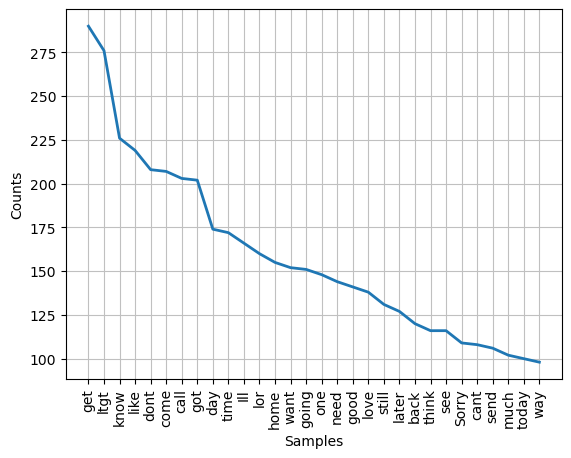

<Axes: xlabel='Samples', ylabel='Counts'>

In [69]:
ham_text.plot(30)

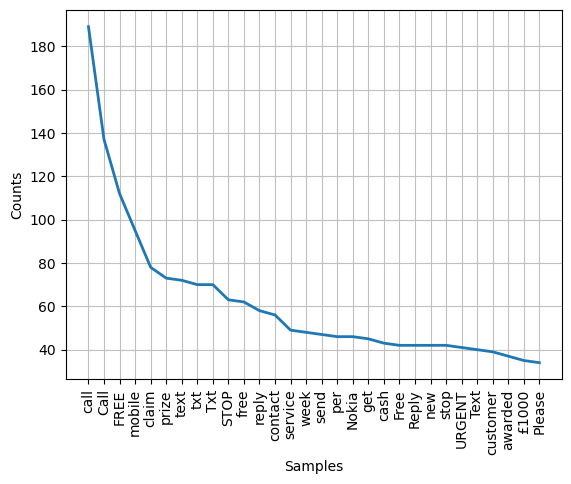

<Axes: xlabel='Samples', ylabel='Counts'>

In [71]:
spam_text.plot(30)

* We can also use the **wordcloud** package for visualization. 
* You can download the package by `conda install -c conda-forge wordcloud`

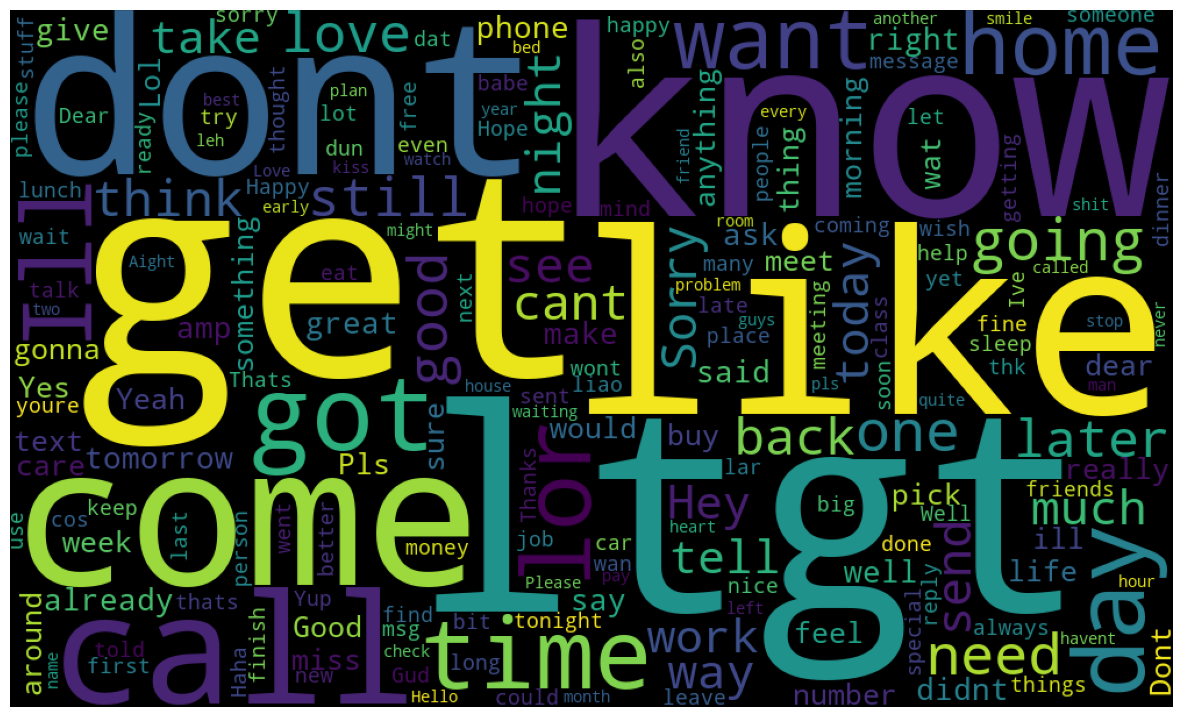

In [73]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))

wc_ham = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.imshow(wc_ham.generate_from_frequencies(freqDist_ham))
plt.axis("off")
plt.show()

## Building a spam flitering system

* We have a data with classifying each message according to "spam" or "ham". 
    * This means that we can build the spam classifier with machine learning model. 
* First, we have to specify feature and target, then split our data into train-test set.

In [75]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preprocessing data

In [77]:
df_sms['message_clean'] = df_sms['message'].apply(preprocessing)

In [79]:
df_sms['message_clean'] = df_sms['message_clean'].apply(', '.join)

In [81]:
df_sms

,label,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...","jurong, point, crazy, Available, bugis, great,..."
1,ham,Ok lar... Joking wif u oni...,"lar, Joking, wif, oni"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"Free, entry, wkly, comp, win, Cup, final, tkts..."
3,ham,U dun say so early hor... U c already then say...,"dun, say, early, hor, already, say"
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah, dont, think, goes, usf, lives, around, th..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"2nd, time, tried, contact, £750, Pound, prize,..."
5568,ham,Will ü b going to esplanade fr home?,"going, esplanade, home"
5569,ham,"Pity, * was in mood for that. So...any other s...","Pity, mood, Soany, suggestions"
5570,ham,The guy did some bitching but I acted like i'd...,"guy, bitching, acted, like, interested, buying..."


In [83]:
x = df_sms['message_clean']
y = df_sms['label']

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

### Vectorization

* Now, we need to convert each message into a vector for utilizing machine learning models.
* Here, we will use the TF-IDF vectorizer with **SciKit Learn** package.

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [93]:
x_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
len(x_train_vec.toarray()[0])

7837

### Model selection and test the classifier

In [99]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(gamma='auto')
svc.fit(x_train_vec, y_train)
pred_svc = svc.predict(x_test_vec)

metrics.accuracy_score(y_test,pred_svc)

0.8779612347451543

In [101]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_vec, y_train)
pred_rfc = rfc.predict(x_test_vec)

metrics.accuracy_score(y_test, pred_rfc)

0.9691313711414213